In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2%}'.format

# Date range
start = '2000-01-01'
end = '2022-07-31'

# Tickers of assets
assets = """RELIANCE.NS
HDFCBANK.NS
ICICIBANK.NS
INFY.NS
HDFCBANK.NS
TCS.NS
ITC.NS
KOTAKBANK.NS
LT.NS
HINDUNILVR.NS
SBIN.NS
AXISBANK.NS
BAJFINANCE.NS
BHARTIARTL.NS
ASIANPAINT.NS
MARUTI.NS
M&M.NS
TITAN.NS
BAJAJFINSV.NS
HCLTECH.NS
SUNPHARMA.NS
TATASTEEL.NS
NTPC.NS
POWERGRID.NS
INDUSINDBK.NS
ULTRACEMCO.NS
NESTLEIND.NS
TECHM.NS
WIPRO.NS
DRREDDY.NS""".split()
print(assets)
#assets = [x + ".NS" for x in assets]
# Downloading data
data = yf.download(assets, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = assets
Y = data[assets].pct_change().dropna()
display(Y.head())



['RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'HDFCBANK.NS', 'TCS.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'TITAN.NS', 'BAJAJFINSV.NS', 'HCLTECH.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'NTPC.NS', 'POWERGRID.NS', 'INDUSINDBK.NS', 'ULTRACEMCO.NS', 'NESTLEIND.NS', 'TECHM.NS', 'WIPRO.NS', 'DRREDDY.NS']
[*********************100%***********************]  29 of 29 completed


ValueError: Length mismatch: Expected axis has 29 elements, new values have 30 elements

In [ ]:
prices = data
display(prices.dropna().head())


,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,369.93%,1301.46%,5437.09%,10032.76%,32412.28%,289.18%,421.34%,1429.23%,5724.06%,13538.52%,...,1642.36%,4404.91%,1212.04%,3477.51%,3293.15%,430.95%,204.14%,698.82%,100.56%,8354.18%
2000-01-04,384.22%,1207.74%,5420.21%,10087.14%,35006.12%,304.27%,406.92%,1461.18%,5941.15%,13383.04%,...,1746.50%,4417.84%,1195.79%,3393.73%,3163.25%,431.79%,201.93%,661.56%,99.13%,9022.56%
2000-01-05,374.22%,1173.35%,5281.93%,9879.24%,33697.38%,328.84%,387.61%,1403.59%,6416.26%,12906.93%,...,1674.71%,4223.44%,1153.81%,3252.35%,3239.97%,440.21%,209.63%,621.17%,98.53%,9169.60%
2000-01-06,364.94%,1239.69%,5643.61%,9334.00%,35706.70%,355.18%,398.34%,1414.94%,6918.42%,13424.99%,...,1759.31%,4284.07%,1152.69%,3361.08%,3374.43%,453.97%,225.29%,670.99%,103.11%,8992.20%
2000-01-07,347.08%,1238.22%,6095.08%,8588.44%,32860.35%,382.71%,384.23%,1415.36%,7225.26%,14156.91%,...,1842.22%,3942.96%,1060.49%,3629.05%,3644.87%,453.13%,230.25%,656.85%,100.69%,8272.91%


In [ ]:


# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

# Method to estimate expected returns based on historical data.
method_mu = 'hist'
# Method to estimate covariance matrix based on historical data.
method_cov = 'hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

# Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
model = 'Classic'
rm = 'MV'  # Risk measure used, this time will be variance
obj = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True  # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0  # Risk aversion factor, only useful when obj is 'Utility'

w1 = port.optimization(model=model, rm=rm,
                       obj=obj, rf=rf, l=l, hist=hist)
# Estimate points in the efficient frontier mean - semi standard deviation

# Estimate the risk parity portfolio for semi standard deviation
#display(w.T)


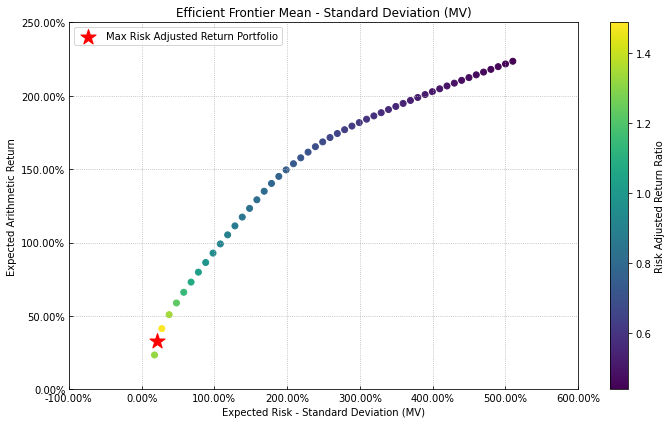

In [ ]:
label = 'Max Risk Adjusted Return Portfolio'  # Title of point
mu = port.mu  # Expected returns
cov = port.cov  # Covariance matrix
returns = port.returns  # Returns of the assets

ws = port.efficient_frontier(
    model=model, rm=rm, points=50, rf=rf, hist=hist)

ef_graph = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w1, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


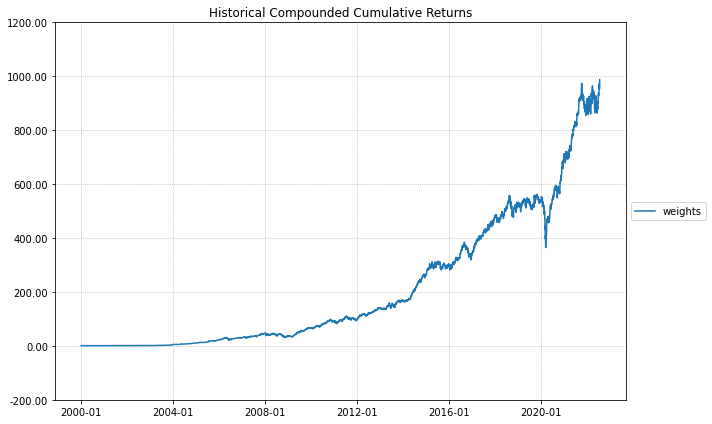

In [ ]:
cagr_graph = rp.plot_series(returns=Y, w=w1, cmap='tab20', height=6, width=10,
                    ax=None)


,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,HDFCBANK.NS,TCS.NS,ITC.NS,KOTAKBANK.NS,LT.NS,HINDUNILVR.NS,...,SUNPHARMA.NS,TATASTEEL.NS,NTPC.NS,POWERGRID.NS,INDUSINDBK.NS,ULTRACEMCO.NS,NESTLEIND.NS,TECHM.NS,WIPRO.NS,DRREDDY.NS
0,12.70%,9.87%,9.51%,7.59%,6.50%,4.63%,4.32%,4.26%,3.49%,3.39%,...,1.41%,1.28%,1.23%,1.21%,1.17%,1.12%,0.99%,0.98%,0.89%,0.75%


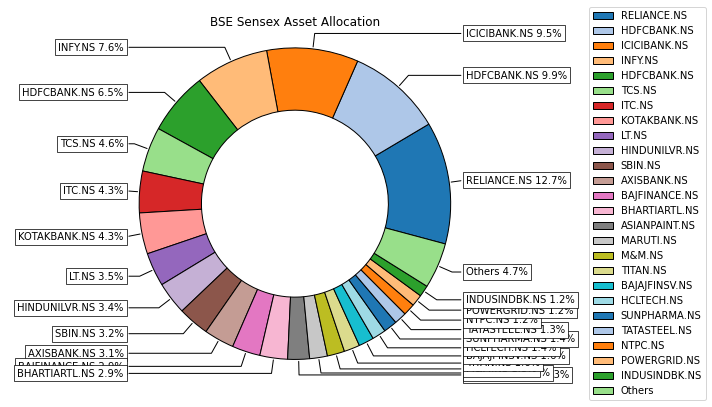

In [19]:
weights = """0.127
0.0987
0.0951
0.0759
0.065
0.0463
0.0432
0.0426
0.0349
0.0339
0.0324
0.0313
0.0292
0.0287
0.0226
0.0184
0.018
0.0164
0.0158
0.0143
0.0141
0.0128
0.0123
0.0121
0.0117
0.0112
0.0099
0.0098
0.0089
0.0075"""
weights = pd.DataFrame(list(map(float, weights.split())), index=assets)

display(weights.T)
ax = rp.plot_pie(w=weights, title='BSE Sensex Asset Allocation', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)


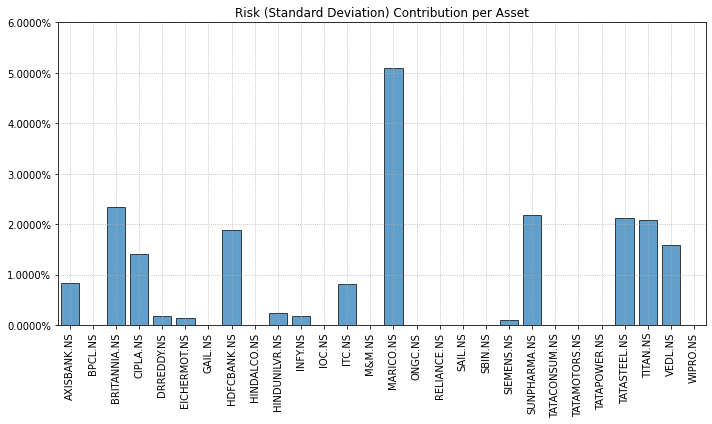

In [ ]:
ax = rp.plot_risk_con(w=w1, cov=cov, returns=Y, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)


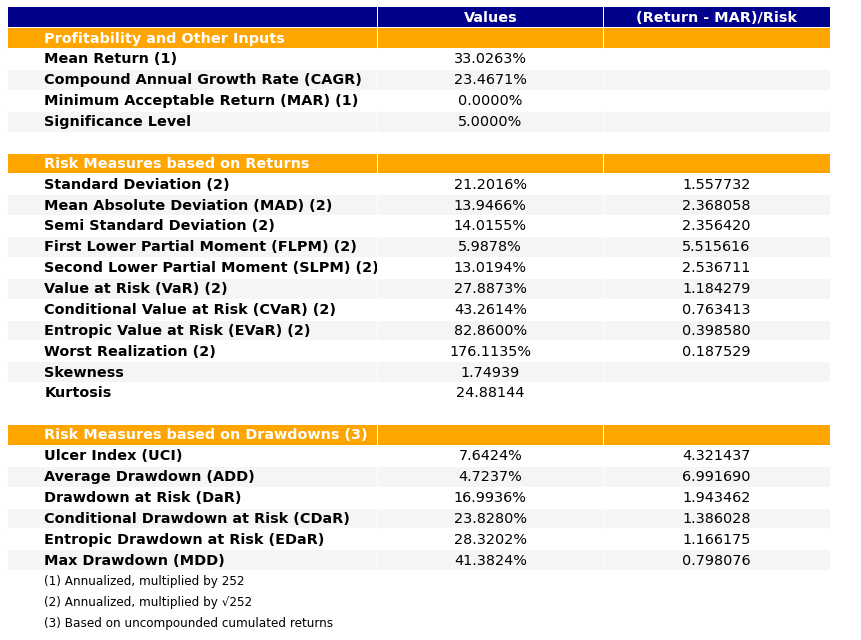

In [ ]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)


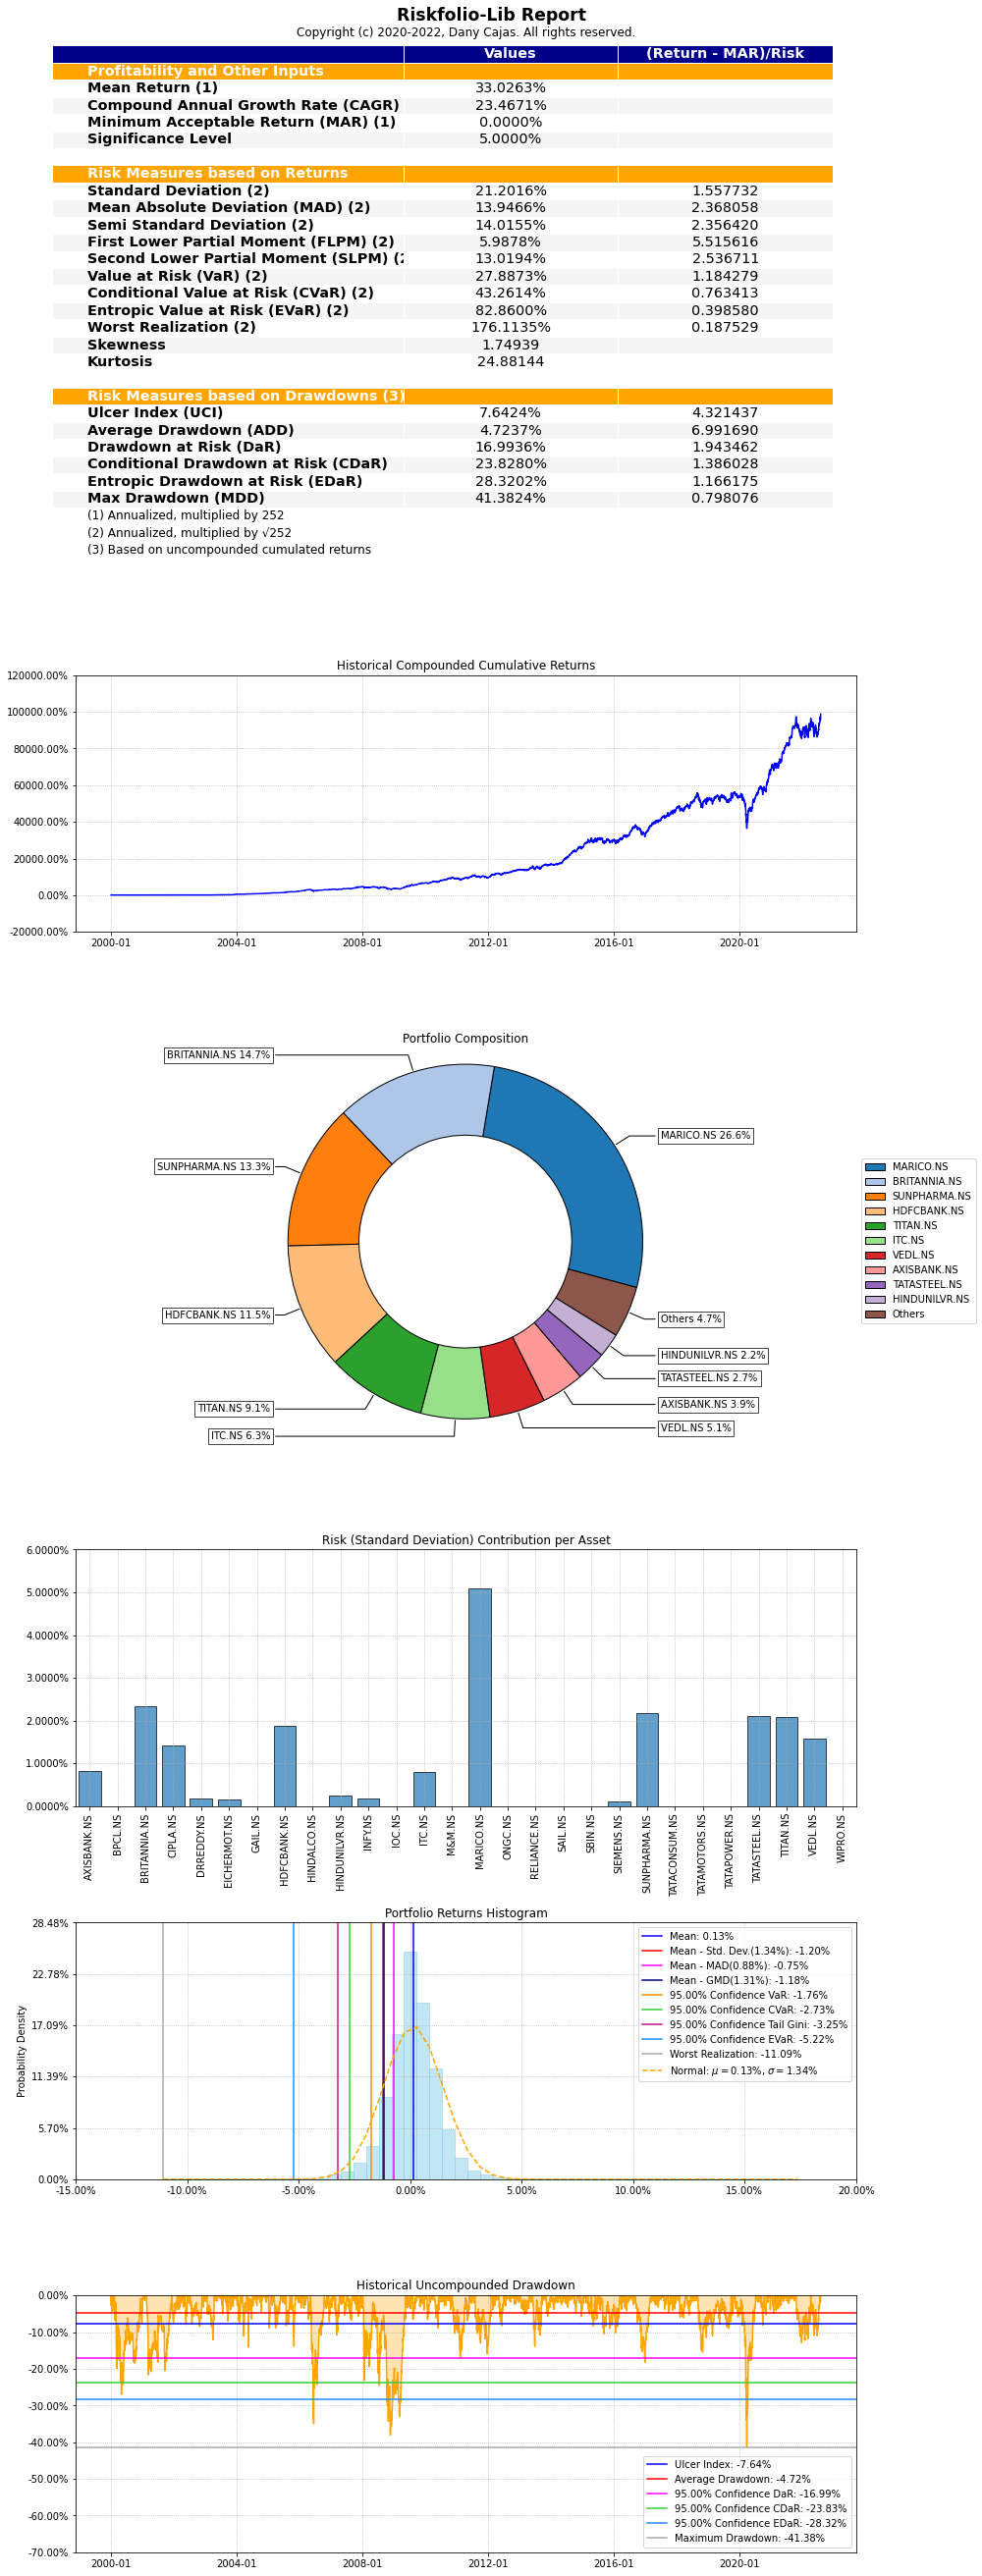

In [ ]:
ax = rp.jupyter_report(returns=Y,
                       w=w1,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       )


In [ ]:
rp.excel_report(returns=Y,
                w=w1,
                rf=0,
                alpha=0.05,
                t_factor=252,
                ini_days=1,
                days_per_year=252,
                name="report")
